<a href="https://colab.research.google.com/github/PiKoz360/test_ml/blob/main/02_analiza_danych/02_dane_gieldowe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* @author: krakowiakpawel9@gmail.com  
* @site: e-smartdata.org

### Pandas
>Strona biblioteki: [https://pandas.pydata.org/](https://pandas.pydata.org/)  
>Dokumentacja: [https://pandas.pydata.org/pandas-docs/stable/](https://pandas.pydata.org/pandas-docs/stable/)
>
>Podstawowa biblioteka do analizy danych w języku Python.
>
>Aby zainstalować bibliotekę Pandas użyj polecenia poniżej:
```
pip install pandas
```
### Spis treści:
1. [Import Bibliotek](#a1)
2. [Załadowanie danych](#a2)
3. [Eksploracja danych](#a3)
4. [Selekcja kolumn](#a4)
5. [Selekcja wierszy](#a5)
6. [Obliczanie nowych kolumn](#a6)
7. [Filtrowanie danych](#a7)










### <a name='a1'></a> Import Bibliotek

In [1]:
import numpy as np
import pandas as pd

print(f'Numpy: {np.__version__}')
print(f'Pandas: {pd.__version__}')

Numpy: 1.26.4
Pandas: 2.1.4


### <a name='a2'></a> Załadowanie danych

pandas.datareader.data jest to biblioteka pozwalająca ściągać dane ze wskazanej strony web

In [9]:
def fetch_financial_data(company='AAPL'):
    """Pobiera dane dotyczące notowań spółek na giełdzie według symboli
    na serwisie stooq.pl"""
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

df = fetch_financial_data()
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2024-08-01 to 2019-08-05
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Close   1257 non-null   float64
 4   Volume  1257 non-null   float64
dtypes: float64(5)
memory usage: 58.9 KB


### <a name='a3'></a> Eksploracja danych

In [10]:
df

,Open,High,Low,Close,Volume
Date,,,,,
2024-08-01,224.3700,224.4800,217.0200,218.3600,6.250100e+07
2024-07-31,221.4400,223.8200,220.6300,222.0800,5.003626e+07
2024-07-30,219.1900,220.3250,216.1200,218.8000,4.164384e+07
2024-07-29,216.9600,219.3000,215.7500,218.2400,3.631178e+07
2024-07-26,218.7000,219.4900,216.0100,217.9600,4.160134e+07
...,...,...,...,...,...
2019-08-09,49.1551,49.5110,48.6626,49.0803,1.008236e+08
2019-08-08,48.6994,49.5110,48.5090,49.4870,1.110306e+08
2019-08-07,47.5360,48.5450,47.1512,48.4223,1.371542e+08


metoda head zwraca domyślnie 5 pierwszych wierszy, chyba że określimy parametr

In [ ]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2019-12-10,1747.40,1750.67,1735.00,1739.21,2515644.0
2019-12-09,1750.66,1766.89,1745.61,1749.42,2502489.0
2019-12-06,1751.20,1754.40,1740.13,1751.60,3119979.0
2019-12-05,1763.50,1763.50,1740.00,1740.48,2827852.0
2019-12-04,1774.01,1789.09,1760.22,1760.69,2680700.0


In [ ]:
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2019-12-10,1747.40,1750.67,1735.00,1739.21,2515644.0
2019-12-09,1750.66,1766.89,1745.61,1749.42,2502489.0
2019-12-06,1751.20,1754.40,1740.13,1751.60,3119979.0


tail- zwraca 5 ostatnich wierszy, przy użyciu parametru to możemy okreslić liczbę wierszy

In [ ]:
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-08,130.70,133.68,129.03,133.52,9826568.0
2010-01-07,131.96,132.32,128.80,130.00,11014197.0
2010-01-06,134.63,134.73,131.65,132.25,7178209.0
2010-01-05,133.25,135.48,131.81,134.69,8851066.0
2010-01-04,136.28,136.61,133.14,133.90,7595995.0


In [ ]:
df.tail(10)

,Open,High,Low,Close,Volume
Date,,,,,
2010-01-15,129.35,129.65,127.06,127.14,15358332.0
2010-01-14,129.18,130.38,126.40,127.35,9704287.0
2010-01-13,128.07,129.71,125.75,129.11,10723052.0
2010-01-12,129.06,129.82,126.55,127.35,9091795.0
2010-01-11,132.73,132.80,129.21,130.31,8777511.0
2010-01-08,130.70,133.68,129.03,133.52,9826568.0
2010-01-07,131.96,132.32,128.80,130.00,11014197.0
2010-01-06,134.63,134.73,131.65,132.25,7178209.0
2010-01-05,133.25,135.48,131.81,134.69,8851066.0


In [11]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

zmiana wielkich liter z małe litery - metoda .lower

In [12]:
df.columns = [col.lower() for col in df.columns]
df.head()

,open,high,low,close,volume
Date,,,,,
2024-08-01,224.37,224.480,217.02,218.36,62500996.0
2024-07-31,221.44,223.820,220.63,222.08,50036262.0
2024-07-30,219.19,220.325,216.12,218.80,41643840.0
2024-07-29,216.96,219.300,215.75,218.24,36311778.0
2024-07-26,218.70,219.490,216.01,217.96,41601345.0


metoda .describe - wyświetla statystyki dotycące obiektu

In [13]:
df.describe()

,open,high,low,close,volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,139.082742,140.638543,137.625590,139.196785,9.647284e+07
std,42.467615,42.757495,42.153325,42.446979,5.320102e+07
min,47.536000,48.181100,46.847100,47.033600,2.404834e+07
25%,117.641000,119.106000,115.428000,117.412000,6.098993e+07
50%,146.145000,147.739000,144.600000,146.075000,8.229118e+07
75%,171.398000,173.351000,170.120000,171.815000,1.138238e+08
max,236.480000,237.230000,233.090000,234.820000,4.347085e+08


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
open,1257.0,1.390827e+02,4.246761e+01,4.753600e+01,1.176410e+02,1.461450e+02,1.713980e+02,2.364800e+02
high,1257.0,1.406385e+02,4.275750e+01,4.818110e+01,1.191060e+02,1.477390e+02,1.733510e+02,2.372300e+02
low,1257.0,1.376256e+02,4.215333e+01,4.684710e+01,1.154280e+02,1.446000e+02,1.701200e+02,2.330900e+02
close,1257.0,1.391968e+02,4.244698e+01,4.703360e+01,1.174120e+02,1.460750e+02,1.718150e+02,2.348200e+02
volume,1257.0,9.647284e+07,5.320102e+07,2.404834e+07,6.098993e+07,8.229118e+07,1.138238e+08,4.347085e+08


### <a name='a4'></a> Selekcja kolumn

In [15]:
df = df.head(10)
df

,open,high,low,close,volume
Date,,,,,
2024-08-01,224.370,224.480,217.020,218.36,62500996.0
2024-07-31,221.440,223.820,220.630,222.08,50036262.0
2024-07-30,219.190,220.325,216.120,218.80,41643840.0
2024-07-29,216.960,219.300,215.750,218.24,36311778.0
2024-07-26,218.700,219.490,216.010,217.96,41601345.0
2024-07-25,218.930,220.850,214.620,217.49,51391199.0
2024-07-24,224.000,224.800,217.130,218.54,61777576.0
2024-07-23,224.365,226.940,222.680,225.01,39960260.0
2024-07-22,227.010,227.780,223.090,223.96,48201835.0


sposoby wycięcia wybranej kolumny

In [16]:
df['open']

,open
Date,
2024-08-01,224.370
2024-07-31,221.440
2024-07-30,219.190
2024-07-29,216.960
2024-07-26,218.700
2024-07-25,218.930
2024-07-24,224.000
2024-07-23,224.365
2024-07-22,227.010


In [ ]:
df.open

Date
2019-12-10    1747.40
2019-12-09    1750.66
2019-12-06    1751.20
2019-12-05    1763.50
2019-12-04    1774.01
2019-12-03    1760.00
2019-12-02    1804.40
2019-11-29    1817.78
2019-11-27    1801.00
2019-11-26    1779.92
Name: open, dtype: float64

In [17]:
df[['open']]

,open
Date,
2024-08-01,224.370
2024-07-31,221.440
2024-07-30,219.190
2024-07-29,216.960
2024-07-26,218.700
2024-07-25,218.930
2024-07-24,224.000
2024-07-23,224.365
2024-07-22,227.010


In [18]:
df[['open', 'close']]

,open,close
Date,,
2024-08-01,224.370,218.36
2024-07-31,221.440,222.08
2024-07-30,219.190,218.80
2024-07-29,216.960,218.24
2024-07-26,218.700,217.96
2024-07-25,218.930,217.49
2024-07-24,224.000,218.54
2024-07-23,224.365,225.01
2024-07-22,227.010,223.96


wycinanie kolumnt dzięki metodzie .iloc
metoda przyjmuje indeksy

In [ ]:
df.iloc[:, 0]

Date
2019-12-10    1747.40
2019-12-09    1750.66
2019-12-06    1751.20
2019-12-05    1763.50
2019-12-04    1774.01
2019-12-03    1760.00
2019-12-02    1804.40
2019-11-29    1817.78
2019-11-27    1801.00
2019-11-26    1779.92
Name: open, dtype: float64

jak chcemy dwie kolummy musimy podać listę kolumn, które chcemy wyciąć z obiekty dataframe

In [19]:
df.iloc[:, [0, 3]]

,open,close
Date,,
2024-08-01,224.370,218.36
2024-07-31,221.440,222.08
2024-07-30,219.190,218.80
2024-07-29,216.960,218.24
2024-07-26,218.700,217.96
2024-07-25,218.930,217.49
2024-07-24,224.000,218.54
2024-07-23,224.365,225.01
2024-07-22,227.010,223.96


wycinanie zakresu kolumn poprzez wskazanie odpowiednich indeksów

In [20]:
df.iloc[:, 3:5]

,close,volume
Date,,
2024-08-01,218.36,62500996.0
2024-07-31,222.08,50036262.0
2024-07-30,218.80,41643840.0
2024-07-29,218.24,36311778.0
2024-07-26,217.96,41601345.0
2024-07-25,217.49,51391199.0
2024-07-24,218.54,61777576.0
2024-07-23,225.01,39960260.0
2024-07-22,223.96,48201835.0


In [ ]:
df.iloc[:, -1]

Date
2019-12-10    2515644.0
2019-12-09    2502489.0
2019-12-06    3119979.0
2019-12-05    2827852.0
2019-12-04    2680700.0
2019-12-03    3529582.0
2019-12-02    3931750.0
2019-11-29    1923440.0
2019-11-27    3023355.0
2019-11-26    3190428.0
Name: volume, dtype: float64

In [ ]:
df.iloc[:, [-1]]

,volume
Date,
2019-12-10,2515644.0
2019-12-09,2502489.0
2019-12-06,3119979.0
2019-12-05,2827852.0
2019-12-04,2680700.0
2019-12-03,3529582.0
2019-12-02,3931750.0
2019-11-29,1923440.0
2019-11-27,3023355.0


In [ ]:
df.iloc[:, -3:]

,low,close,volume
Date,,,
2019-12-10,1735.00,1739.21,2515644.0
2019-12-09,1745.61,1749.42,2502489.0
2019-12-06,1740.13,1751.60,3119979.0
2019-12-05,1740.00,1740.48,2827852.0
2019-12-04,1760.22,1760.69,2680700.0
2019-12-03,1747.23,1769.96,3529582.0
2019-12-02,1762.68,1781.60,3931750.0
2019-11-29,1800.79,1800.80,1923440.0
2019-11-27,1797.31,1818.51,3023355.0


### <a name='a5'></a>  Selekcja wierszy

In [21]:
df

,open,high,low,close,volume
Date,,,,,
2024-08-01,224.370,224.480,217.020,218.36,62500996.0
2024-07-31,221.440,223.820,220.630,222.08,50036262.0
2024-07-30,219.190,220.325,216.120,218.80,41643840.0
2024-07-29,216.960,219.300,215.750,218.24,36311778.0
2024-07-26,218.700,219.490,216.010,217.96,41601345.0
2024-07-25,218.930,220.850,214.620,217.49,51391199.0
2024-07-24,224.000,224.800,217.130,218.54,61777576.0
2024-07-23,224.365,226.940,222.680,225.01,39960260.0
2024-07-22,227.010,227.780,223.090,223.96,48201835.0


In [22]:
df.iloc[0]

,2024-08-01 00:00:00
open,224.37
high,224.48
low,217.02
close,218.36
volume,62500996.00


In [ ]:
df.iloc[:3]

,open,high,low,close,volume
Date,,,,,
2019-12-10,1747.40,1750.67,1735.00,1739.21,2515644.0
2019-12-09,1750.66,1766.89,1745.61,1749.42,2502489.0
2019-12-06,1751.20,1754.40,1740.13,1751.60,3119979.0


In [23]:
df

,open,high,low,close,volume
Date,,,,,
2024-08-01,224.370,224.480,217.020,218.36,62500996.0
2024-07-31,221.440,223.820,220.630,222.08,50036262.0
2024-07-30,219.190,220.325,216.120,218.80,41643840.0
2024-07-29,216.960,219.300,215.750,218.24,36311778.0
2024-07-26,218.700,219.490,216.010,217.96,41601345.0
2024-07-25,218.930,220.850,214.620,217.49,51391199.0
2024-07-24,224.000,224.800,217.130,218.54,61777576.0
2024-07-23,224.365,226.940,222.680,225.01,39960260.0
2024-07-22,227.010,227.780,223.090,223.96,48201835.0


In [ ]:
df.loc['2019-12-10': '2019-12-02']

,open,high,low,close,volume
Date,,,,,
2019-12-10,1747.40,1750.67,1735.00,1739.21,2515644.0
2019-12-09,1750.66,1766.89,1745.61,1749.42,2502489.0
2019-12-06,1751.20,1754.40,1740.13,1751.60,3119979.0
2019-12-05,1763.50,1763.50,1740.00,1740.48,2827852.0
2019-12-04,1774.01,1789.09,1760.22,1760.69,2680700.0
2019-12-03,1760.00,1772.87,1747.23,1769.96,3529582.0
2019-12-02,1804.40,1805.55,1762.68,1781.60,3931750.0


### <a name='a6'></a> Obliczanie nowych kolumn

In [24]:
df = fetch_financial_data('UBER')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2024-08-01 to 2019-08-05
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Close   1257 non-null   float64
 4   Volume  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


In [25]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2024-08-01,64.860,65.0000,60.76,61.02,18967935
2024-07-31,63.880,65.1820,63.66,64.47,18209679
2024-07-30,64.150,64.7700,62.61,63.09,16506187
2024-07-29,64.835,65.2554,63.72,63.76,16906996
2024-07-26,66.100,66.2600,64.18,64.40,17379446


In [26]:
df.describe()

,Open,High,Low,Close,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,41.890071,42.679781,41.067175,41.879539,2.499344e+07
std,14.167100,14.265435,14.013370,14.122739,1.755323e+07
min,15.960000,17.800000,13.710000,14.820000,5.021190e+06
25%,31.160000,31.800000,30.470000,31.180000,1.596493e+07
50%,37.930000,38.620000,37.080000,37.820000,2.098392e+07
75%,49.690000,50.500000,48.760000,49.700000,2.888893e+07
max,81.940000,82.140000,80.790000,81.390000,3.642612e+08


In [27]:
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2024-08-01,64.86,65.000,60.76,61.02,18967935
2024-07-31,63.88,65.182,63.66,64.47,18209679
2024-07-30,64.15,64.770,62.61,63.09,16506187


budowanie nowej zmiennej w nowej kolumnie


In [28]:
df['Average'] = (df.Open + df.Close) / 2.0
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2024-08-01,64.860,65.0000,60.76,61.02,18967935,62.9400
2024-07-31,63.880,65.1820,63.66,64.47,18209679,64.1750
2024-07-30,64.150,64.7700,62.61,63.09,16506187,63.6200
2024-07-29,64.835,65.2554,63.72,63.76,16906996,64.2975
2024-07-26,66.100,66.2600,64.18,64.40,17379446,65.2500


sortowanie od najtarszych danych

In [29]:
df = df.sort_index()
df.head()

,Open,High,Low,Close,Volume,Average
Date,,,,,,
2019-08-05,39.35,39.420,38.4325,39.05,9799269,39.200
2019-08-06,39.68,40.808,38.3600,39.15,8570273,39.415
2019-08-07,39.06,39.990,38.3200,39.70,8896039,39.380
2019-08-08,41.98,43.000,41.2500,42.97,29610463,42.475
2019-08-09,39.56,40.680,38.7100,40.05,35138775,39.805


metoda .shift pozwoli nam przesunąć dane o jeden wiersz
wykonanie poprzez dodanie dodatkowej kolumny w której będa dane z dnia poprzedniego

In [30]:
df['Close_shift'] = df.Close.shift(1)
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift
Date,,,,,,,
2019-08-05,39.35,39.420,38.4325,39.05,9799269,39.200,NaN
2019-08-06,39.68,40.808,38.3600,39.15,8570273,39.415,39.05
2019-08-07,39.06,39.990,38.3200,39.70,8896039,39.380,39.15
2019-08-08,41.98,43.000,41.2500,42.97,29610463,42.475,39.70
2019-08-09,39.56,40.680,38.7100,40.05,35138775,39.805,42.97


In [32]:
df['Daily_Change'] = df.Close / df.Close_shift - 1
df.head(10)

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-08-05,39.35,39.4200,38.4325,39.05,9799269,39.200,NaN,NaN
2019-08-06,39.68,40.8080,38.3600,39.15,8570273,39.415,39.05,0.002561
2019-08-07,39.06,39.9900,38.3200,39.70,8896039,39.380,39.15,0.014049
2019-08-08,41.98,43.0000,41.2500,42.97,29610463,42.475,39.70,0.082368
2019-08-09,39.56,40.6800,38.7100,40.05,35138775,39.805,42.97,-0.067954
2019-08-12,39.84,39.9500,37.0000,37.00,20632310,38.420,40.05,-0.076155
2019-08-13,37.00,37.4600,36.1200,36.45,19031422,36.725,37.00,-0.014865
2019-08-14,36.00,36.2999,33.3600,33.96,24481636,34.980,36.45,-0.068313
2019-08-15,34.52,34.5500,32.9200,33.22,13265793,33.870,33.96,-0.021790


In [ ]:
del df['Daily Change']

In [34]:
df.head()

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-08-05,39.35,39.420,38.4325,39.05,9799269,39.200,NaN,NaN
2019-08-06,39.68,40.808,38.3600,39.15,8570273,39.415,39.05,0.002561
2019-08-07,39.06,39.990,38.3200,39.70,8896039,39.380,39.15,0.014049
2019-08-08,41.98,43.000,41.2500,42.97,29610463,42.475,39.70,0.082368
2019-08-09,39.56,40.680,38.7100,40.05,35138775,39.805,42.97,-0.067954


In [35]:
df.Daily_Change.min()

-0.21628767847699626

In [36]:
df.Daily_Change.max()

0.3825910931174088

histogram rozkładu stopy zwrot

dodatkowo zaimportowana biblioteka seaborn - wykorzystywana do wizualizacji danych

<Axes: >

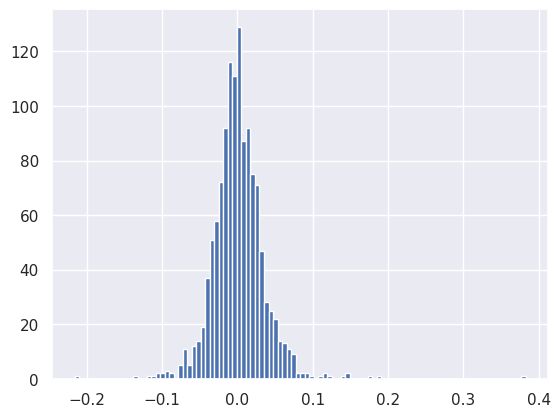

In [37]:
import seaborn as sns
sns.set()

df.Daily_Change.hist(bins=100)

metoda .plot wyświetli wykres zamknięcia z obiektu df

<Axes: xlabel='Date'>

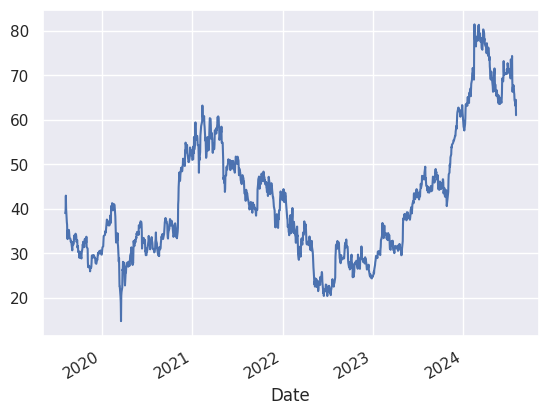

In [38]:
df.Close.plot()

### <a name='a7'></a> Filtrowanie danych

In [39]:
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-08-05,39.350,39.4200,38.4325,39.05,9799269,39.2000,NaN,NaN
2019-08-06,39.680,40.8080,38.3600,39.15,8570273,39.4150,39.05,0.002561
2019-08-07,39.060,39.9900,38.3200,39.70,8896039,39.3800,39.15,0.014049
2019-08-08,41.980,43.0000,41.2500,42.97,29610463,42.4750,39.70,0.082368
2019-08-09,39.560,40.6800,38.7100,40.05,35138775,39.8050,42.97,-0.067954
...,...,...,...,...,...,...,...,...
2024-07-26,66.100,66.2600,64.1800,64.40,17379446,65.2500,65.74,-0.020383
2024-07-29,64.835,65.2554,63.7200,63.76,16906996,64.2975,64.40,-0.009938
2024-07-30,64.150,64.7700,62.6100,63.09,16506187,63.6200,63.76,-0.010508


filtrowanie tylko po danych powyżej '0'
ustawienie dataframe z nazwą positive i wskazanie że z df ma 'wycinać' dane (maskę logiczną) z informacjami gdzie wartości są większe od wskazanego '0'

In [40]:
df_positive = df[df.Daily_Change > 0]
df_positive

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-08-06,39.68,40.808,38.360,39.15,8570273,39.415,39.05,0.002561
2019-08-07,39.06,39.990,38.320,39.70,8896039,39.380,39.15,0.014049
2019-08-08,41.98,43.000,41.250,42.97,29610463,42.475,39.70,0.082368
2019-08-16,33.46,35.480,33.400,35.23,13883152,34.345,33.22,0.060506
2019-08-20,34.48,36.070,34.390,35.29,10766387,34.885,34.61,0.019648
...,...,...,...,...,...,...,...,...
2024-07-11,69.51,73.645,68.850,73.53,26702460,71.520,69.27,0.061498
2024-07-16,73.11,75.400,73.110,74.30,17528998,73.705,72.29,0.027805
2024-07-19,66.78,67.440,66.100,67.31,12809588,67.045,66.26,0.015847


obliczenie średniej dla powyższego

In [41]:
df_positive.Daily_Change.mean()

0.025345306223420214

wyciągnięcie sesji z ujemną stopą zwrotu

In [42]:
 df_negative = df[df.Daily_Change < 0]
 df_negative

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-08-09,39.560,40.6800,38.71,40.05,35138775,39.8050,42.97,-0.067954
2019-08-12,39.840,39.9500,37.00,37.00,20632310,38.4200,40.05,-0.076155
2019-08-13,37.000,37.4600,36.12,36.45,19031422,36.7250,37.00,-0.014865
2019-08-14,36.000,36.2999,33.36,33.96,24481636,34.9800,36.45,-0.068313
2019-08-15,34.520,34.5500,32.92,33.22,13265793,33.8700,33.96,-0.021790
...,...,...,...,...,...,...,...,...
2024-07-25,66.000,69.3700,64.40,65.74,22596919,65.8700,66.14,-0.006048
2024-07-26,66.100,66.2600,64.18,64.40,17379446,65.2500,65.74,-0.020383
2024-07-29,64.835,65.2554,63.72,63.76,16906996,64.2975,64.40,-0.009938


obliczenie średniej ujemnej ze stopy zwrotu

In [43]:
 df_negative.Daily_Change.mean()

-0.02280801471521469

czy jest szanza, żeby cena close była równa cenie najwyższej danego dnia

In [44]:
df.Close == df.High

,0
Date,
2019-08-05,False
2019-08-06,False
2019-08-07,False
2019-08-08,False
2019-08-09,False
2019-08-12,False
2019-08-13,False
2019-08-14,False
2019-08-15,False


In [45]:
df[df.Close == df.High]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-08-25,31.04,31.19,30.60,31.19,10056762,31.115,31.04,0.004832
2020-12-04,52.71,54.86,52.71,54.86,22207887,53.785,52.52,0.044554
2021-02-04,56.45,57.85,56.11,57.85,13847255,57.150,57.12,0.012780
2022-11-30,27.80,29.14,27.64,29.14,18177028,28.470,27.76,0.049712


In [46]:
df[df.Close == df.Low]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-08-12,39.84,39.95,37.00,37.00,20632310,38.420,40.05,-0.076155
2019-12-09,27.96,28.36,27.68,27.68,21098387,27.820,27.86,-0.006461
2019-12-27,30.80,31.06,30.17,30.17,18465965,30.485,30.67,-0.016303
2020-12-31,53.28,53.28,51.00,51.00,13282786,52.140,53.15,-0.040452
2021-12-31,42.53,43.12,41.93,41.93,13746893,42.230,42.66,-0.017112
2023-01-05,25.73,26.01,25.55,25.55,9942038,25.640,25.91,-0.013894
2023-05-16,37.93,38.15,37.44,37.44,21836864,37.685,38.14,-0.018353
2023-05-30,38.73,39.06,37.56,37.56,18143192,38.145,38.45,-0.023147


jak możemy wicinać konkretne sesje i notowania

"dobranie się" do indeksu
sprawdzenie gdzie indeks jest powyżej wskazanej daty
maskę logiczną wykorzystamy do wycięcia danych

In [49]:
df.index > '2020-11-01'

array([False, False, False, ...,  True,  True,  True])

In [50]:
df[df.index > '2020-11-01']

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-11-02,34.150,35.0500,34.06,34.81,18350453,34.4800,33.41,0.041904
2020-11-03,35.270,36.1500,35.15,35.77,16208783,35.5200,34.81,0.027578
2020-11-04,40.660,42.1500,39.00,40.99,101818168,40.8250,35.77,0.145932
2020-11-05,40.330,42.0500,40.01,41.96,34177623,41.1450,40.99,0.023664
2020-11-06,42.090,45.3800,41.62,44.87,57670672,43.4800,41.96,0.069352
...,...,...,...,...,...,...,...,...
2024-07-26,66.100,66.2600,64.18,64.40,17379446,65.2500,65.74,-0.020383
2024-07-29,64.835,65.2554,63.72,63.76,16906996,64.2975,64.40,-0.009938
2024-07-30,64.150,64.7700,62.61,63.09,16506187,63.6200,63.76,-0.010508


ograniczenie zakresu indeksów

trzeba pamiętać o nawiasach odpowiednich

In [52]:
df[(df.index >= '2020-11-01') & (df.index < '2020-11-15')]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-11-02,34.15,35.05,34.060,34.81,18350453,34.480,33.41,0.041904
2020-11-03,35.27,36.15,35.150,35.77,16208783,35.520,34.81,0.027578
2020-11-04,40.66,42.15,39.000,40.99,101818168,40.825,35.77,0.145932
2020-11-05,40.33,42.05,40.010,41.96,34177623,41.145,40.99,0.023664
2020-11-06,42.09,45.38,41.620,44.87,57670672,43.480,41.96,0.069352
2020-11-09,48.01,49.62,47.300,48.18,61632340,48.095,44.87,0.073769
2020-11-10,46.74,49.36,46.045,47.00,33079784,46.870,48.18,-0.024491
2020-11-11,46.72,47.52,45.910,46.23,19213685,46.475,47.00,-0.016383
2020-11-12,45.39,47.47,45.050,46.40,16255467,45.895,46.23,0.003677


alternatywa do powyższego zapisu tyle, że w określeniem dokładnie wskazanych dni, które mają byc zaprezentowane

In [54]:
df[(df.index == '2019-11-01') | (df.index == '2020-11-07')]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-11-01,31.45,31.7,30.7412,31.37,10460430,31.41,31.5,-0.004127


In [ ]:
df

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-05-10,42.00,45.000,41.0600,41.57,186322536,41.785,NaN,NaN
2019-05-13,38.79,39.240,36.0800,37.10,79442420,37.945,41.57,-0.107529
2019-05-14,38.31,39.960,36.8500,39.96,46661147,39.135,37.10,0.077089
2019-05-15,39.37,41.880,38.9500,41.29,36086065,40.330,39.96,0.033283
2019-05-16,41.48,44.060,41.2500,43.00,38115524,42.240,41.29,0.041414
...,...,...,...,...,...,...,...,...
2019-12-04,29.10,29.200,28.7000,29.06,22526474,29.080,29.02,0.001378
2019-12-05,28.94,28.990,28.1800,28.65,22567274,28.795,29.06,-0.014109
2019-12-06,28.40,28.925,27.8001,27.86,33144371,28.130,28.65,-0.027574


wykonanie filtrowania z indeksem (maska logiczna) tylko za maj

In [55]:
df[df.index.month == 5]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2020-05-01,29.13,29.7200,28.325,28.39,19290192,28.760,30.27,-0.062108
2020-05-04,27.56,28.0700,26.580,27.42,23428333,27.490,28.39,-0.034167
2020-05-05,28.25,28.9088,27.440,28.07,30725371,28.160,27.42,0.023705
2020-05-06,27.50,28.0600,26.810,27.82,31076451,27.660,28.07,-0.008906
2020-05-07,29.60,31.6500,29.580,30.93,62229496,30.265,27.82,0.111790
...,...,...,...,...,...,...,...,...
2024-05-24,63.78,64.7600,63.620,64.26,10385892,64.020,63.60,0.010377
2024-05-28,64.61,64.6100,63.100,63.52,14213346,64.065,64.26,-0.011516
2024-05-29,63.01,65.3650,62.910,64.93,16987906,63.970,63.52,0.022198


z indeksem tylko dla dni

In [ ]:
df[df.index.day == 1]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2019-07-01,46.98,47.0400,44.0600,44.27,17739998,45.625,46.38,-0.045494
2019-08-01,42.14,42.5355,41.0000,41.31,7349740,41.725,42.14,-0.019696
2019-10-01,30.37,30.5100,28.6500,29.15,13448055,29.760,30.47,-0.043321
2019-11-01,31.45,31.7000,30.7412,31.37,10460430,31.410,31.50,-0.004127


In [56]:
df[df.index.year == 2022]

,Open,High,Low,Close,Volume,Average,Close_shift,Daily_Change
Date,,,,,,,,
2022-01-03,42.48,44.405,41.890,43.95,26364965,43.215,41.93,0.048176
2022-01-04,44.23,44.800,42.580,44.42,30845320,44.325,43.95,0.010694
2022-01-05,44.29,45.900,42.860,43.24,28498663,43.765,44.42,-0.026565
2022-01-06,43.11,44.080,40.970,42.03,32434252,42.570,43.24,-0.027983
2022-01-07,42.00,42.650,41.200,41.51,24875831,41.755,42.03,-0.012372
...,...,...,...,...,...,...,...,...
2022-12-23,24.46,24.725,24.162,24.64,11610045,24.550,24.64,0.000000
2022-12-27,24.29,24.700,23.900,24.40,15258601,24.345,24.64,-0.009740
2022-12-28,24.21,24.720,24.020,24.59,15669206,24.400,24.40,0.007787
